Simple tests for interval overlap logic

In [1]:
from vmcdemo.interbaseinterval import InterbaseInterval
from IPython.display import display, Markdown

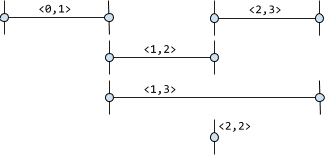

In [2]:
iis = [
    InterbaseInterval(0,1),
    InterbaseInterval(1,1),
    InterbaseInterval(1,2),
    InterbaseInterval(1,3),
    InterbaseInterval(2,2)
    ]

In [3]:
def pairwise_apply(iis, method_name):
    """return matrix of method_name applied to iis pairs"""
    m = getattr(InterbaseInterval, method_name)
    return [[m(r,c) for c in iis] for r in iis]

def pairwise_apply_md(iis, method_name):
    """return markdown table of pairwise_apply"""
    tbl = [["r.{}(c)".format(method_name)] + [str(ii) for ii in iis]]
    tbl += [["-"] * len(tbl[0])]
    for ii, row in zip(iis, pairwise_apply(iis, method_name)):
        tbl += [[str(ii)] + row]
    tbl_str = "\n".join(["|".join(map(str,row)) for row in tbl])
    return Markdown("# "+method_name + "\n" + tbl_str)

In [4]:
for mn in "encloses overlap overlaps within".split():
    display(pairwise_apply_md(iis, mn))

# encloses
r.encloses(c)|<0,1>|<1,1>|<1,2>|<1,3>|<2,2>
-|-|-|-|-|-
<0,1>|True|True|False|False|False
<1,1>|False|True|False|False|False
<1,2>|False|True|True|False|True
<1,3>|False|True|True|True|True
<2,2>|False|False|False|False|True

# overlap
r.overlap(c)|<0,1>|<1,1>|<1,2>|<1,3>|<2,2>
-|-|-|-|-|-
<0,1>|1|0|0|0|-1
<1,1>|0|0|0|0|-1
<1,2>|0|0|1|1|0
<1,3>|0|0|1|2|0
<2,2>|-1|-1|0|0|0

# overlaps
r.overlaps(c)|<0,1>|<1,1>|<1,2>|<1,3>|<2,2>
-|-|-|-|-|-
<0,1>|True|True|True|True|False
<1,1>|True|True|True|True|False
<1,2>|True|True|True|True|True
<1,3>|True|True|True|True|True
<2,2>|False|False|True|True|True

# within
r.within(c)|<0,1>|<1,1>|<1,2>|<1,3>|<2,2>
-|-|-|-|-|-
<0,1>|True|False|False|False|False
<1,1>|True|True|True|True|False
<1,2>|False|False|True|True|False
<1,3>|False|False|False|True|False
<2,2>|False|False|True|True|True